In [32]:
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import random
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
np.set_printoptions(suppress=True) # Suprime notação cientifica

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [34]:
path = "/content/gdrive/MyDrive/Reconhecimento de Padrões/spam-detection/spam_ham_dataset.csv"

In [35]:
# Remove pontuações e stopwords do texto e retorna uma matriz com uma palavra
# do texto em cada posição
def process_text(text):
   
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    #Limpa palavras
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word != 'Subject']

    return clean_words

In [46]:
data = ['this is a demo document used as demo','this is a document test used as test document','demo is the last document used']
vectorizer = CountVectorizer(analyzer=process_text)
test = vectorizer.fit_transform(data)
print(vectorizer.get_feature_names())
print(test.toarray())

['demo', 'document', 'last', 'test', 'used']
[[2 1 0 0 1]
 [0 2 0 2 1]
 [1 1 1 0 1]]


In [37]:
def loadData(data=path):
     df = pd.read_csv(data)
     df.dropna(inplace=True)
     df.reset_index(inplace=True) # Corrigir problema de index
     X = df['text'].values
     y = df['label_num'].values

     return X, y

In [38]:
def balanceData(X,y):
   X = textVectorizer(X)

   smote_bal = SMOTE(random_state = 100)

   X_res, y_res = smote_bal.fit_resample(X, y) 

     
   return X_res,y_res

In [39]:
df = pd.read_csv(path)

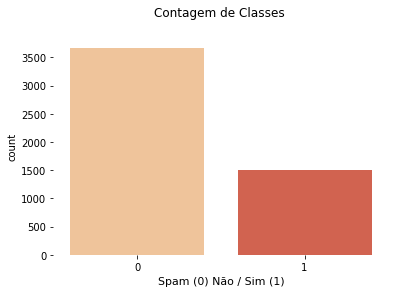

In [ ]:
# Dados desbalanceados
# sns.countplot(df.label_num, palette = "OrRd")
# plt.box(False)
# plt.xlabel('Spam (0) Não / Sim (1)', fontsize = 11)
# plt.title('Contagem de Classes \n')
# plt.show();

In [ ]:
# Dados balanceados
# X,y = loadData()
# X,y = balanceData(X,y)

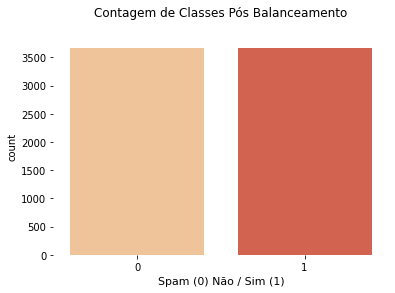

In [ ]:
# sns.countplot(y, palette = "OrRd")
# plt.box(False)
# plt.xlabel('Spam (0) Não / Sim (1)', fontsize = 11)
# plt.title('Contagem de Classes Pós Balanceamento\n')
# plt.show();

In [40]:
# Retorna um vetor com a contagem de quantas vezes a palavra repetiu no texto recebido
def textVectorizer(data):
    vectorizer = CountVectorizer(analyzer=process_text)

    X = vectorizer.fit_transform(data)

    return X.toarray()

In [41]:
# Divisão do dataset em conjuntos de treinamento e teste, proporção 2/3
def dataSplit(X,y,test_size=0.33,shuffle=True):
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=24,shuffle=shuffle) 
   return X_train, X_test, y_train, y_test

In [ ]:
# Imprimir a curva ROC
def plotRocCurve(y_test,pred):
  fpr, tpr, thresholds = metrics.roc_curve(y_test,pred,pos_label=1)
  auc = metrics.auc(fpr,tpr)
  print("AUC:", auc)
  plt.plot([0,1], [0,1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
  plt.plot(fpr, tpr, color='b', label=r'ROC (AUC = %0.02F)' % (auc), lw=2, alpha=.8)
  plt.suptitle('ROC CURVE')
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.legend(loc='lower right')
  plt.show()


In [ ]:
# Imprimir a Matriz de Confusão
def showConfusionMatrix(cm):
  confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não é spam','É spam'])
  confusion_matrix_display.plot()
  plt.show();

In [ ]:
# Realizar o  treinamento dos modelos
def trainModels(model,classifier_name):
  X,y = loadData()
  
  # Balanceamento
  X,y = balanceData(X,y)

  # Divisão conjunto de dado e treinamento
  X_train, X_test, y_train, y_test = dataSplit(X,y)

  print(f"Iniciando treinamento do modelo {classifier_name}\n")
  model.fit(X_train,y_train) # Faz o treinamento 
  pred = model.predict(X_test) # Vetor com a classificação de cada amostra do teste

  # Acurácia
  print(np.asarray(y_test).shape)
  print((np.sum(pred == np.asarray(y_test)))/ np.asarray(y_test).shape[0])

  cm = confusion_matrix(y_test, pred)
  tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

  acc = ((tn+tp) / (tn+fp+fn+tp)) 
  tpr = (tp / (tp + fn) ) 
  tnr = (tn / (tn + fp))

  print(f"Acc: {acc}")
  print(f"TPR: {tpr}")
  print(f"TNR: {tnr}")
  showConfusionMatrix(cm)
  plotRocCurve(y_test,pred)

Iniciando treinamento do modelo SVM Linear

(2424,)
0.9748349834983498
Acc: 0.9748349834983498
TPR: 0.9857142857142858
TNR: 0.9643435980551054


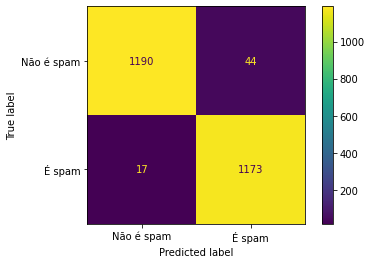

AUC: 0.9750289418846956


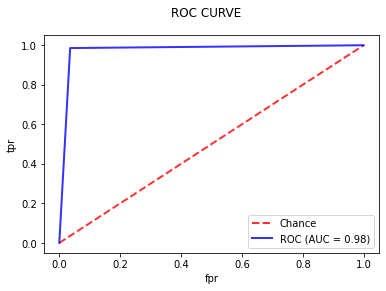

Iniciando treinamento do modelo SVM Rbf

(2424,)
0.9434818481848185
Acc: 0.9434818481848185
TPR: 0.9966386554621849
TNR: 0.8922204213938412


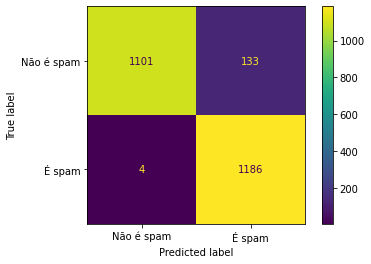

AUC: 0.944429538428013


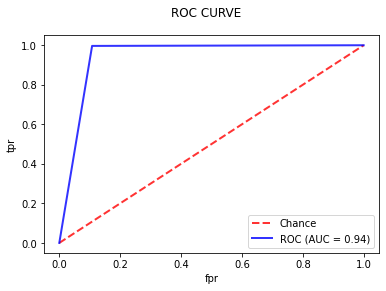

64.77559368213018


In [ ]:
def main():
   start = time.time()
   trainModels(SVC(kernel="linear",probability=True), "SVM Linear")
   trainModels(SVC(kernel="rbf",probability=True), "SVM Rbf")
   print(f"{(time.time() - start) / 60 }")
   
if __name__ == "__main__":
  main()